<h1>laser_cutting<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Данные</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Part_name" data-toc-modified-id="Part_name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Part_name</a></span></li><li><span><a href="#Material" data-toc-modified-id="Material-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Material</a></span></li><li><span><a href="#Time" data-toc-modified-id="Time-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Time</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li></ul></li><li><span><a href="#Width,-Length" data-toc-modified-id="Width,-Length-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Width, Length</a></span></li><li><span><a href="#Сut_length" data-toc-modified-id="Сut_length-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Сut_length</a></span></li><li><span><a href="#Cut_quantity" data-toc-modified-id="Cut_quantity-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Cut_quantity</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Кодирование-и-заполнение-пропусков" data-toc-modified-id="Кодирование-и-заполнение-пропусков-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Кодирование и заполнение пропусков</a></span></li><li><span><a href="#Визуализация-(признак-\-target)" data-toc-modified-id="Визуализация-(признак-\-target)-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Визуализация (признак \ target)</a></span></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итог</a></span></li></ul></div>

# Импорт библиотек

In [3]:
from datetime import datetime, time, timedelta
import re
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns





# Данные

## Загрузка данных

In [4]:
link = "../data/laser_cutting.csv"

In [5]:
cutting = pd.read_csv(link, on_bad_lines="skip")
backup = cutting.copy()

In [6]:
cutting.head(3)

,Наименование,Материал,Операция,hash,Время,Ширина,Длина,Длина реза,Кол-во резов
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
1,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
2,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1


Сразу переименуем заголовки признаков на английский

In [7]:
cutting.rename(columns={'Наименование': 'Part_name',
                        'Материал': 'Material',
                        'Время': 'Time',
                        'Ширина': 'Width',
                        'Длина': 'Length',
                        'Длина реза': 'Cut_length',
                        'Кол-во резов': 'Cut_quantity',
                        'Операция': 'Operation'}, inplace=True)

In [8]:
cutting.head(3)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
1,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
2,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1


## Описание данных

---

ДАНО

---

Данные выгружены с производства металлических изделий. 

Происходит операция раскроя заготовок на станках лазерной резки.

Станки вырезают металлические заготовки разных форм и размеров из разных материалов, для дальнейшего производста изделий. 

- Part_name - Наименование изделия. Так, как сотрудник забил его в систему.
- Material - Наименование материала, тоже так, как его записал сотрудник.
- Operation - Тип операции, Листовой лазер (ЛР) или трубный лазер (ТР)
- hash - хеш операции, записано станком
- Time - время резки заготовки, записано станком
- Length - Длина заготовки (габаритная)
- Width - Ширина заготовки (габаритная)
- Сut_length - длина линии реза
- Cut_quantity - количество врезок

---
ЗАДАЧА

---

Предсказать время резки для новой заготовки










# EDA

In [9]:
cutting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484609 entries, 0 to 484608
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Part_name     484609 non-null  object 
 1   Material      484609 non-null  object 
 2   Operation     484609 non-null  object 
 3   hash          484609 non-null  object 
 4   Time          484609 non-null  object 
 5   Width         484609 non-null  float64
 6   Length        484609 non-null  float64
 7   Cut_length    484609 non-null  int64  
 8   Cut_quantity  484609 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 33.3+ MB


На первый взгляд все признаки заполнены без пропусков, есть числовые, есть категориальные. 

Будем подробнее смотреть столбцы по одному

Проверим на дубликаты. Для этого по логике данных можно использовать столбец hash

In [10]:
cutting[cutting.duplicated(subset='hash')]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
1,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
2,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
3,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
4,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
5,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
...,...,...,...,...,...,...,...,...,...
484604,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.7,180.000,110.000,558,2
484605,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.8,180.000,110.000,558,2
484606,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.7,180.000,110.000,558,2
484607,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.7,180.000,110.000,558,2


Действительно, с одним hash абсолютно одинаковые детали.

Помотрим, сколько уникальных записей

In [11]:
cutting['hash'].value_counts(dropna=True)

hash
028252ed1     10009
1bc5d0b97      7502
0305fba64      4979
39d678ef5d     4756
1d2c2c93e      4000
              ...  
7853f184f7        1
8417d785af        1
79f1e916d3        1
79546f4211        1
28ed570cf         1
Name: count, Length: 17830, dtype: int64

In [12]:
len(cutting['hash'].unique())

17830

Удалим дубликаты

In [13]:
cutting.drop_duplicates(subset='hash', inplace=True)

In [14]:
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35
...,...,...,...,...,...,...,...,...,...
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"Труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8
484526,облако,"Лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5
484561,Швеллер 15х25х15х1810 с овал.перф,"Лист х/к т. 1,5 мм.",ЛР,16788de56e,00:01:45.4,1810.000,50.000,6537,73
484564,Мангал складной_Черная сталь 1.5 мм_Деталь 1501,"Лист х/к т. 1,5 мм.",ЛР,3696257c07,00:00:11.2,221.000,52.000,747,9


Далее пойдем по признакам по очереди

## Part_name

Тут в целом может быть записано все, что угодно

>Идея. Попытаться разбить децимальный номер и наименование (часто оно характеризует форму\вид детали)

Посмотрим на уникальные наименования

In [15]:
cutting['Part_name'].value_counts(dropna=False)[:20]

Part_name
Ребро для опоры 60х30, возв. 10, тр. 40х20, смещ. 12 мм              77
Ребро для опоры 40х40, возв.10, насквозь, тр.40х20 смещ.12           46
FUR.4001.001 КЕО МОБИ Кронштейн кабель-канала одинарного (верный)    39
Ребро для опоры 60х30, возв.10, насквозь, тр.40х20 Ст3 Л4,0          33
28.313.02 СКАТЛ Боковина Л1.2                                        27
Ребро для опоры 40х40 мм, возв.10, насквозь, тр.40х20                25
01.341.01 П2 Перекладина д. 25 (на 2 бутыли) перенесен рез           24
Пластина нижняя толщ. 4мм 15х58мм S=0.0009м2                         23
01.132.02 Основание стойки Тр. д. 30 ИЗМ                             23
01.131.03 Бутыледержатель Тр. д.25х1,5 ИЗМ                           22
01.211.01 БС4 Стойка на 4 полки (заовал.отв)                         22
01.200.04 СТЕЛЛА Перемычка нижняя L365                               22
37.214-1.05 Кронштейн                                                21
Кронштейн Custom ПРАВЫЙ СБ                            

Странно, что осталось очень много одинаковых наименований. Возможно, это все одно и то же, но резалось в разные дни или разными партиями

Посмотрим на дубликаты по наименованию внимательнее

In [16]:
duplicate_names = cutting.loc[cutting['Part_name'].duplicated(), 'Part_name']

# Отфильтровать строки, где значения в столбце совпадают с дублирующимися значениями
cutting[cutting['Part_name'].isin(duplicate_names)].sort_values(by='Part_name')[:20]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
24290,(01) 220711.220.002 Фланец,"Лист г/к т. 8,0 мм.",ЛР,34f90f9de5,00:01:40.1,80.000,180.000,1134,19
24276,(01) 220711.220.002 Фланец,"Лист г/к т. 8,0 мм.",ЛР,349783022d,00:01:40.1,80.000,180.000,1134,19
24292,(01) 220714.220.006 Фланец,"Лист г/к т. 8,0 мм.",ЛР,341b857b18,00:02:03.7,185.000,198.000,1611,29
24281,(01) 220714.220.006 Фланец,"Лист г/к т. 8,0 мм.",ЛР,349ef5092c,00:02:08.9,185.000,198.000,1611,29
442663,00001.04.120-01 - 430нерж!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,5cba7a52c,00:00:10.6,120.000,120.000,559,5
208875,00001.04.120-01 - 430нерж!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,54b350c9f,00:00:10.8,120.000,120.000,559,5
429217,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,81ed4fbc36,00:00:12.4,170.000,170.000,809,9
116627,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,76787113d6,00:00:12.4,170.000,170.000,809,9
299202,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,92e3d03cb1,00:00:12.5,170.000,170.000,809,9
454152,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,226a61b531,00:00:12.4,170.000,170.000,809,9


теория подтверждается, т.к помимо имени совпадают и другие характеристики. 

Это одинаковые изделия, но скорее всего делаются в разные дни\разными операторами и время резки немного отличается

Здесь вопрос, стоит ли удалять эти дубликаты. Пока что удалим. 

При обучении модели попробуем оба варианта

In [17]:
cutting.drop_duplicates(subset='Part_name', inplace=True)
len(cutting)

11243

Теперь точно только уникальные детали

In [18]:
cutting['Part_name'].value_counts()[:20]

Part_name
Круг 40                                                                   1
1.5mm_1502                                                                1
60.05.02 40x20-Tn1,5-450-2 Труба                                          1
18-1.406.01Л ПАНТОВА 40х40 Стойка ЛЕВАЯ выс. 705                          1
18-1.406.02 ПАНТОВА 40х40 Перекладина верхняя шир.1600 мм                 1
18-1.471.02 ПАНТОВА 40х40 Перекладина шир. 800 L794                       1
18-1.406.01ПР ПАНТОВА 40х40 Стойка ПРАВАЯ выс. 705                        1
Ребро проходное для опоры 50х50, возв.10, тр. 40х20, смещ. 12, нижнее     1
1.5mm_1501                                                                1
Ребро проходное для опоры 50х50, возв.10, тр. 40х20, смещ. 12, верхнее    1
99.520.09 Ребро 25х25х4                                                   1
60.05.02 40x20-Tn1,5-720-2 Труба                                          1
99.520.10 Заглушка 30х30х4                                                1
80

>Пробуем вытащить ключевые слова (кроме предлогов) в отдельный признак. Как говорилось выше, идея в том, что наименование обычно присваивают по виду\классу изделия (труба, балка, стойка, короб итд)

In [19]:
def get_keywords(name):
    # Определяем список предлогов и несущественных слов, которые нужно исключить
    stop_words = {'и', 'в', 'на', 'с', 'под', 'за',
                  'для', 'по', 'от', 'до', 'над', 
                  'через', 'у', 'о', 'об', 'при', 
                  'из', 'а', 'но', 'или', 'xx', 'хх',
                 'мм', 'ст', 'шт', 'тр', 'дл',
                 "шир", "выс", "пр"}
    
    name = re.sub(r'[\W_]', ' ', name)

    # Удаляем нетекстовые символы и числа
    name = re.sub(r'[^А-Яа-яЁё\s]', '', name)
    
    # Разбиваем строку на слова и удаляем лишние пробелы
    words = name.strip().split()
    
    # Фильтруем слова, исключая предлоги и слова, которые короче 2 символов
    keywords = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 1]
    
    return keywords

Функция разбивает строку на ключевые слова и воозвращает их списком.

Созданим новый признак keywords и посмотрим как сработало 

In [20]:
cutting['keywords'] = cutting['Part_name'].apply(get_keywords)

In [21]:
cutting.head(5)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг]
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след]
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]"
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]"
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка]


In [22]:
cutting.tail(5)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords
484239,кот,"Лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4,[кот]
484390,кот лицо,"Лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9,"[кот, лицо]"
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"Труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8,"[турон, балка, поддержки]"
484526,облако,"Лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5,[облако]
484564,Мангал складной_Черная сталь 1.5 мм_Деталь 1501,"Лист х/к т. 1,5 мм.",ЛР,3696257c07,00:00:11.2,221.000,52.000,747,9,"[мангал, складной, черная, сталь, деталь]"


In [23]:
cutting[345:350]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords
12175,99-1.312.08 Накладка-короб,"Лист нерж. т. 1,0 мм. (AISI 304) мат.",ЛР,25d767d524,00:00:22.7,1244.000,794.000,4097,1,"[накладка, короб]"
12188,33.02.15_Подложка_18_,"Лист нерж. т. 1,0 мм. (AISI 304) мат.",ЛР,9197cafa37,00:00:28.1,240.000,450.000,3135,8,[подложка]
12189,33.02.17_Подложка_бок,"Лист нерж. т. 1,0 мм. (AISI 304) мат.",ЛР,91204935a0,00:00:08.5,240.000,510.000,1500,1,"[подложка, бок]"
12190,33.02.16_Подложка_2А,"Лист нерж. т. 1,0 мм. (AISI 304) мат.",ЛР,910ca5bfd8,00:01:03.4,240.000,510.000,4985,22,[подложка]
12192,33.02.09_Креп_дверцы,"Лист нерж. т. 1,0 мм. (AISI 304) мат.",ЛР,913b7699a0,00:00:04.5,32.000,10.000,113,4,"[креп, дверцы]"


In [24]:
cutting['keywords'].value_counts(dropna=True)

keywords
[]                            2605
[стойка]                       365
[перекладина]                  349
[пластина]                     313
[балка]                        301
                              ... 
[доп, креп, фронт, панель]       1
[креп, фронт, панель]            1
[пельменная]                     1
[чебурашка, большая]             1
[облако]                         1
Name: count, Length: 2855, dtype: int64

Проверили, конечно, не все слова. Но выборочно выглядит вполне неплохо, то, что и хотели

Отметим, что получилось много сэплов без ключевых слов

>Идея. Нужно преобразовывать ключевые слова в признаки. Предполагаем, что если слово в наименовании встречается часто, например "пластина", то это типовая деталь и делается проще. А если "облако" и встречается редко, то это какая-то сложная деталь

Вытащим наши ключевые слова из списков в отдельные записи, применив explode. Делаем на вспомогательном df

In [25]:
cutting_keywords = cutting.explode('keywords')

In [26]:
cutting_keywords.head(10)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,круг
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,след
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,перекладина
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,низ
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,стойка
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,центр
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,стойка
68,АДЛБ.745551.002 Шпангоут,"Лист х/к т. 3,0 мм.",ЛР,45c1ca3b3a,00:00:15.8,200.000,30.000,509,5,адлб
68,АДЛБ.745551.002 Шпангоут,"Лист х/к т. 3,0 мм.",ЛР,45c1ca3b3a,00:00:15.8,200.000,30.000,509,5,шпангоут
70,Перекладина нижн. центр. Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,155c63daf0,00:00:39.0,357.000,155.000,533,9,перекладина


Посмотрим уникальные значения

In [27]:
cutting_keywords['keywords'].value_counts(dropna=False)[0:15]

keywords
NaN            2605
перекладина     953
стойка          948
пластина        747
тбнд            558
балка           481
фланец          375
кронштейн       373
ребро           300
стола           270
отв             250
левая           219
правая          217
лист            202
уголок          191
Name: count, dtype: int64

In [28]:
cutting_keywords['keywords'].value_counts()[-15:-1:1]

keywords
лыжи           1
право          1
листовой       1
микрон         1
воротник       1
дверцы         1
карусель       1
емию           1
мерен          1
сборе          1
стекла         1
письма         1
верхнего       1
тарельчатая    1
Name: count, dtype: int64

>Для преобразования в числа нужно как-то агрегировать слова из списка keywords. Предполагаем, что количество слов в списках неодинаково и использовать среднее значение некорректно + мы хотим зацепить какие то редкие явления. Поэтому для агрегации используем слово с минимальным числом повторений в датасете

In [29]:
#Получаем словарь уникакальных слов. {слово: количество}
keywords_counts = cutting_keywords['keywords'].value_counts().to_dict()

#Создаем новый признак. Map заменяет слово на его частоту упоминания 
cutting_keywords['keyword_count'] = cutting_keywords['keywords'].map(keywords_counts)

#Так как мы делали explode, склеиваем обратно, т.е группировка по индексу. 
#Агрегирующая функция - минимальное значение. 
cutting_keywords = cutting_keywords.groupby(cutting_keywords.index)['keyword_count'].min()
cutting_keywords=pd.DataFrame(cutting_keywords)

In [30]:
cutting['keywords_count'] = cutting_keywords['keyword_count']
cutting[0:10]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],2.000
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76.000
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]",18.000
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000
68,АДЛБ.745551.002 Шпангоут,"Лист х/к т. 3,0 мм.",ЛР,45c1ca3b3a,00:00:15.8,200.000,30.000,509,5,"[адлб, шпангоут]",2.000
70,Перекладина нижн. центр. Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,155c63daf0,00:00:39.0,357.000,155.000,533,9,"[перекладина, нижн, центр]",12.000
73,Стойка центр.-1 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,15976f5ffe,00:01:23.4,1576.000,155.000,639,27,"[стойка, центр]",18.000
322,Перекладина верх. центр. Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,15c43a81bb,00:00:39.2,316.000,155.000,447,10,"[перекладина, верх, центр]",18.000
372,19-1.011.02 ИГО-51 Фланец 130х130,"Лист х/к т. 3,0 мм.",ЛР,74a914cf03,00:00:18.5,135.000,120.000,641,5,"[иго, фланец]",9.000


Посмотрим внимательнее на наши пропуски

In [31]:
cutting[cutting['keywords_count'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count
3576,29023.01.01_02,"Лист г/к т. 5,0 мм.",ЛР,9420b9a03c,00:00:20.1,74.000,120.000,542,3,[],NaN
3586,00050.00.02.002.01,"Лист г/к т. 5,0 мм.",ЛР,94f0670aef,00:00:28.6,160.000,182.000,834,3,[],NaN
3598,00050.00.02.001.01,"Лист г/к т. 5,0 мм.",ЛР,94d3bcf9ed,00:00:58.4,312.000,250.000,1594,8,[],NaN
3616,62052.02.02_00,"Лист г/к т. 5,0 мм.",ЛР,94f84035c0,00:00:07.3,70.000,27.000,193,1,[],NaN
3806,03042.02.01_00,"Лист г/к т. 5,0 мм.",ЛР,94716d519c,00:00:52.8,243.000,235.000,1382,9,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...
474626,DV00.02-01,"Лист нерж. т. 3,0 мм. (AISI 304) мат.",ЛР,21c1d0bc90,00:03:04.6,353.000,562.000,4758,68,[],NaN
480771,02020.03.01_00,"Лист г/к т. 6,0 мм.",ЛР,42291095b1,00:00:40.7,255.000,121.000,848,4,[],NaN
480995,02020.01.01_00,"Лист г/к т. 6,0 мм.",ЛР,42c6a2cb0f,00:01:20.4,434.000,174.000,1622,9,[],NaN
482757,02020.02.01_00,"Лист г/к т. 6,0 мм.",ЛР,424434edbe,00:00:44.5,140.000,140.000,831,6,[],NaN


В целом, все логично. Пропуски получились там, где у детали в названии нет слов, только номер. 

Пока что оставляем, но отметим, что далее эти пропуски нужно будет заполнить

## Material

Переходим к признаку материал. Посмотрим, какие есть уникальные значения, как они записаны

In [32]:
cutting['Material'].value_counts(dropna=False)[:20]

Material
Лист г/к т. 6,0 мм.                      2080
Лист х/к т. 2,0 мм.                      1030
Лист х/к т. 3,0 мм.                       845
Лист г/к т. 4,0 мм.                       724
Труба проф. 60*30*2,0                     552
Лист г/к т. 5,0 мм.                       505
Лист х/к т. 1,5 мм.                       465
Труба проф. 40*40*2,0                     462
Труба проф. 40*20*1,5                     399
Лист г/к т. 10,0 мм.                      338
Лист г/к т. 8,0 мм.                       323
Лист х/к т. 1,0 мм.                       319
Лист х/к т. 1,2 мм.                       188
Труба проф. 40*20*2,0                     160
Труба проф. 20*20*1,5                     147
Труба проф. 25*25*1,5                     147
Лист нерж. т. 2,0 мм. (AISI 304) мат.     141
Труба проф. 50*50*2,0                     141
Лист нерж. т. 3,0 мм. (AISI 304) мат.     126
Труба проф. 50*25*2,0                     124
Name: count, dtype: int64

In [33]:
len(cutting['Material'].unique())

199

У материалов в само название зашито 2 признака.

- Толщина материала
- Марка материала

(еще зашито лист или труба, но это есть и так в operation)

Есть 2 идеи, как это обработать

> Вытащить из наименования материала марку и толщину материала, как отдельные признаки. 

> Сгруппировать данные по материалу, посчитать для них среднее время резки, и среднюю длину резки (cut_length). По школьной форрмуле S = V * t можно найти и среднегрупповую скорость резки. Использовать ее для расчета времени, как baseline

In [34]:
#Почистим лишние пробелы + переведем слова к нижнему регистру
cutting['Material']=cutting['Material'].apply(lambda x: x.strip().lower())

Для получения материалов сделаю словарик руками, и буду относить материалы в группы по ключевым словам

In [35]:
def get_material_mark(name):
    materials_dict = {
        ('эл/св', 'труба', 'проф'): 'Сталь',
        ('нерж', 'aisi', 'нерж.'): 'Нержавейка',
        ('09г2с',): '09Г2С',
        ('д16', 'дюраль', "амг2", "амг3", "амг5"): 'Алюминий',
        ('65г',): "65Г",
        ('латунь', 'л63'): 'Латунь',
        ('оцинк',): 'Оцинковка',
        ('cor-ten',): 'CORTEN',
        ('медь',): 'медь',
        ('бронза',): 'бронза',
        ('hardox',): 'Hardox',
        ('60с2а',): '60С2А',
        ('титан',): 'Титан'
    }
    
    for key in materials_dict:
        if any(k in name for k in key):
            return (materials_dict[key])
    return 'Сталь'

In [36]:
cutting['material_mark'] = cutting['Material'].apply(lambda x: get_material_mark(x))
cutting['material_mark'].value_counts(dropna=False)

material_mark
Сталь         9939
Нержавейка     641
09Г2С          254
Алюминий       228
65Г             56
Оцинковка       53
медь            25
Латунь          24
CORTEN           9
60С2А            6
бронза           5
Hardox           2
Титан            1
Name: count, dtype: int64

Пробуем вытащить толщины. По формату записи материалы бывают двух типов:

- Лист х/к т. 1,2 мм.               
- Труба проф. 40*20*2,0 

Для труб всегда есть указание размеров через * , а в конце толщина. Значит пробуем рабить строку по * и преобразовать в число -1 элемент. 

Для листов тоже укана толщина, в виде "т. 1,2 мм". Кажется, везде цифра отделена пробелом. Поэтому для листа смотрим, в каком списке (после split()) остались только числа

Если что-то идет не так, запишем в "Ошибка"

In [37]:
def extract_thickness(material):
    try:
        material = material.lower().replace(',', '.').split()
        thickness = None
        for word in material:
            # Проверка на наличие формата типа "60*30*2,0"
            if '*' in word:
                thickness = float(word.split('*')[-1])
                break
            # Проверка на наличие числа с точкой или без нее
            elif all(char.isdigit() or char == '.' for char in word):
                # Исключаем очевидные ошибки, например "304" или "60*30"
                if '.' in word or len(word) < 3:
                    thickness = float(word)
                    break
        return thickness if thickness is not None else 'Ошибка'
    except:
        return 'Ошибка'

In [38]:
cutting['thickness'] = cutting['Material'].apply(extract_thickness)
cutting['thickness'].value_counts(dropna=False)

thickness
2.000      2894
6.000      2137
1.500      1647
3.000      1159
4.000       822
5.000       567
1.000       496
10.000      395
8.000       379
1.200       248
0.800       172
2.500       126
0.500        66
12.000       64
14.000       20
0.300        16
16.000       12
 Ошибка       9
0.600         3
3.500         3
0.550         3
0.700         3
2.800         1
7.000         1
Name: count, dtype: int64

Посмотрим выборочно, как отработала функция

In [39]:
cutting[['Material', 'thickness']][100:110]

,Material,thickness
2904,"лист х/к т. 2,5 мм.",2.500
3028,"лист г/к т. 5,0 мм.",5.000
3034,"лист г/к т. 5,0 мм.",5.000
3047,"лист г/к т. 5,0 мм.",5.000
3253,"лист х/к т. 2,5 мм.",2.500
3324,"лист г/к т. 5,0 мм.",5.000
3341,"лист г/к т. 5,0 мм.",5.000
3368,"лист г/к т. 5,0 мм.",5.000
3420,"лист г/к т. 5,0 мм.",5.000
3436,"лист х/к т. 3,0 мм.",3.000


In [40]:
cutting[['Material', 'thickness']][1340:1350]

,Material,thickness
31952,"лист г/к т. 6,0 мм.",6.000
31996,"лист г/к т. 6,0 мм.",6.000
32017,"лист г/к т. 6,0 мм.",6.000
32057,"лист х/к т. 0,8 мм.",0.800
32068,"лист х/к т. 0,8 мм.",0.800
32078,"лист х/к т. 0,8 мм.",0.800
32119,"лист х/к т. 1,0 мм.",1.000
32132,"лист х/к т. 1,0 мм.",1.000
32244,"лист х/к т. 1,0 мм.",1.000
32265,"лист х/к т. 1,0 мм.",1.000


In [41]:
cutting[['Material', 'thickness']][10040:10050]

,Material,thickness
418291,"лист г/к т. 8,0 мм.",8.000
418294,"труба проф. 30*30*1,5",1.500
418296,"труба проф. 30*30*1,5",1.500
418310,"труба проф. 30*30*1,5",1.500
418316,"труба проф. 30*30*1,5",1.500
418334,"лист нерж. т. 1,2 мм. (aisi 316l) мат.",1.200
418412,"труба проф. 25*25*1,5",1.500
418416,"лист х/к т. 1,0 мм. ст.65г",1.000
418441,"лист х/к т. 1,0 мм. ст.65г",1.000
418480,"лист г/к т. 8,0 мм.",8.000


Похоже, что функция отработала нормально

Посмотрим, сколько ошибок

In [42]:
len(cutting[cutting['thickness']=='Ошибка'])

9

А теперь на сами ошибки

In [43]:
cutting[cutting['thickness']=='Ошибка'][['Material', 'thickness']]

,Material,thickness
174714,панель боковая арт.34812-100 schroff,Ошибка
181752,"дин-рейка с насечкой dkc omega 3a, 2м 35x15мм 02145",Ошибка
181997,заготовка: монтажная рейка,Ошибка
182201,"дин-рейка с насечкой dkc omega 3a, 2м 35x15мм 02145",Ошибка
275406,швеллер 14п (прямополочный),Ошибка
397017,панель боковая арт.34812-100 schroff,Ошибка
399991,панель боковая арт.34812-100 schroff,Ошибка
471155,"сетка пвл r16*6-1,0-1,5 08пс 1000*2000",Ошибка
471290,"сетка пвл r16*6-1,0-1,5 08пс 1000*2000",Ошибка


В ошибки попали совсем уж нестандартные материалы. Просто уберем их,всего 9 шт. не страшно

In [44]:
cutting = cutting[(cutting['thickness']!='Ошибка')]

Посмотрим нет ли nan

In [45]:
len(cutting[cutting['thickness'].isna()])

0

Толщина может принимать значения в диапазоне 0..20 мм (по параметрам самого станка)

Проверим "на дурака"

In [46]:
cutting[cutting['thickness']>20]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness


In [47]:
cutting[cutting['thickness']<0]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness


## Time

Время переведем в удобный формат datetime

In [48]:
def convert_to_seconds(time_str):
    # Убедимся, что time_str является строкой
    if not isinstance(time_str, str):
        try:
            time_str = str(time_str)
        except Exception as e:
            print(f"Ошибка конвертации: {e}")
            return None

    # Попытка парсинга строки времени с миллисекундами
    try:
        if '.' in time_str:
            time_obj = datetime.strptime(time_str, "%H:%M:%S.%f")
        else:
            time_obj = datetime.strptime(time_str, "%H:%M:%S")
    except ValueError as e:
        print(f"Ошибка парсинга: {e}")
        return None
    
    # Преобразование в timedelta
    delta = timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second, microseconds=time_obj.microsecond)
    
    # Получение общего количества секунд и округление до целого числа
    total_seconds = round(delta.total_seconds())
    
    return int(total_seconds)

In [49]:
cutting.loc[:, 'converted_Time']=cutting['Time'].apply(convert_to_seconds)

Ошибка парсинга: time data '5мм\\Лист гк т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data '260х60 (5,0)\\Лист гк т' does not match format '%H:%M:%S'


/tmp/ipykernel_6730/1357176764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutting.loc[:, 'converted_Time']=cutting['Time'].apply(convert_to_seconds)


In [50]:
cutting['converted_Time'].value_counts()

converted_Time
12.000      280
24.000      277
10.000      273
8.000       261
18.000      248
14.000      245
19.000      242
16.000      236
20.000      231
4.000       221
25.000      216
22.000      216
13.000      208
6.000       203
26.000      202
9.000       195
7.000       195
11.000      192
23.000      189
5.000       174
21.000      165
28.000      162
15.000      158
17.000      154
30.000      146
38.000      140
48.000      139
32.000      133
27.000      131
46.000      131
42.000      126
29.000      126
34.000      125
44.000      116
36.000      113
47.000      113
3.000       110
40.000      110
35.000      108
31.000      105
43.000      103
39.000      101
33.000      100
41.000       95
49.000       93
45.000       92
50.000       89
60.000       88
58.000       88
56.000       81
37.000       80
52.000       80
74.000       80
54.000       78
73.000       77
57.000       77
61.000       75
51.000       75
53.000       74
68.000       72
59.000       63
70.000   

In [51]:
cutting[cutting['converted_Time'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time
274726,Пластина 260х80 4 паза,"лист г/к т. 5,0 мм.",ЛР,445460cda7,5мм\Лист гк т,260.000,80.000,1361,9,"[пластина, паза]",2.000,Сталь,5.000,NaN
285901,ТБНД.02.41.00.10 Шина (часть1),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,83eca79a1a,т,120.000,44.000,377,3,"[тбнд, шина, часть]",7.000,бронза,0.300,NaN
285990,ТБНД.02.41.00.10 Шина (часть2),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,8378dced36,т,14.000,158.000,363,2,"[тбнд, шина, часть]",7.000,бронза,0.300,NaN
307334,"ТБНД.93.12.00.08-01 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,223d5bc8a,т,36.000,24.000,152,3,"[тбнд, водило, датчика, брб]",2.000,бронза,0.600,NaN
307381,"ТБНД.93.12.00.08 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,287b3b9a2,т,22.000,24.000,124,3,"[тбнд, водило, датчика, брб]",2.000,бронза,0.600,NaN
451078,"Пластина 260х60 (5,0)","лист г/к т. 5,0 мм.",ЛР,91bd9bb943,"260х60 (5,0)\Лист гк т",260.000,60.000,640,1,[пластина],747.000,Сталь,5.000,NaN


### Заполнение пропусков

1. Сгруппируем по материалу и толщине и возьмем их среднюю скорость резки
2. Посчитаем время по формуле t = S / U


In [52]:
cutting.loc[:,'avg_group_time'] = (cutting
                             .groupby(['thickness', 'material_mark'])['converted_Time']
                             .transform(lambda x: x.mean())
)


cutting.loc[:,'avg_group_length'] = (cutting
                             .groupby(['thickness', 'material_mark'])['Cut_length']
                             .transform(lambda x: x.mean())
)

cutting.loc[:,'avg_group_speed'] = cutting['avg_group_length'] / cutting['avg_group_time']

/tmp/ipykernel_6730/1712647066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutting.loc[:,'avg_group_time'] = (cutting
/tmp/ipykernel_6730/1712647066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutting.loc[:,'avg_group_length'] = (cutting
/tmp/ipykernel_6730/1712647066.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Запомним список индексов пропусков

In [53]:
i = cutting[cutting['converted_Time'].isna()].index
i

Index([274726, 285901, 285990, 307334, 307381, 451078], dtype='int64')

In [54]:
cutting.loc[cutting['converted_Time'].isna(), 'converted_Time'] = (
    cutting['Cut_length'] / cutting['avg_group_speed']
)

In [55]:
cutting.loc[i]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed
274726,Пластина 260х80 4 паза,"лист г/к т. 5,0 мм.",ЛР,445460cda7,5мм\Лист гк т,260.000,80.000,1361,9,"[пластина, паза]",2.000,Сталь,5.000,50.294,52.160,1411.503,27.061
285901,ТБНД.02.41.00.10 Шина (часть1),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,83eca79a1a,т,120.000,44.000,377,3,"[тбнд, шина, часть]",7.000,бронза,0.300,10.545,12.000,429.000,35.750
285990,ТБНД.02.41.00.10 Шина (часть2),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,8378dced36,т,14.000,158.000,363,2,"[тбнд, шина, часть]",7.000,бронза,0.300,10.154,12.000,429.000,35.750
307334,"ТБНД.93.12.00.08-01 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,223d5bc8a,т,36.000,24.000,152,3,"[тбнд, водило, датчика, брб]",2.000,бронза,0.600,NaN,NaN,138.000,NaN
307381,"ТБНД.93.12.00.08 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,287b3b9a2,т,22.000,24.000,124,3,"[тбнд, водило, датчика, брб]",2.000,бронза,0.600,NaN,NaN,138.000,NaN
451078,"Пластина 260х60 (5,0)","лист г/к т. 5,0 мм.",ЛР,91bd9bb943,"260х60 (5,0)\Лист гк т",260.000,60.000,640,1,[пластина],747.000,Сталь,5.000,23.650,52.160,1411.503,27.061


2 значения не заполнились, для них возьмем среднюю скорость, сгрупперованную по материалу

In [56]:
cutting.loc[cutting['avg_group_speed'].isna(), 'avg_group_speed'] = (cutting
                             .groupby(['material_mark'])['avg_group_speed']
                             .transform(lambda x: x.mean())
                                             )

In [57]:
cutting.loc[i]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed
274726,Пластина 260х80 4 паза,"лист г/к т. 5,0 мм.",ЛР,445460cda7,5мм\Лист гк т,260.000,80.000,1361,9,"[пластина, паза]",2.000,Сталь,5.000,50.294,52.160,1411.503,27.061
285901,ТБНД.02.41.00.10 Шина (часть1),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,83eca79a1a,т,120.000,44.000,377,3,"[тбнд, шина, часть]",7.000,бронза,0.300,10.545,12.000,429.000,35.750
285990,ТБНД.02.41.00.10 Шина (часть2),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,8378dced36,т,14.000,158.000,363,2,"[тбнд, шина, часть]",7.000,бронза,0.300,10.154,12.000,429.000,35.750
307334,"ТБНД.93.12.00.08-01 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,223d5bc8a,т,36.000,24.000,152,3,"[тбнд, водило, датчика, брб]",2.000,бронза,0.600,NaN,NaN,138.000,35.750
307381,"ТБНД.93.12.00.08 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,287b3b9a2,т,22.000,24.000,124,3,"[тбнд, водило, датчика, брб]",2.000,бронза,0.600,NaN,NaN,138.000,35.750
451078,"Пластина 260х60 (5,0)","лист г/к т. 5,0 мм.",ЛР,91bd9bb943,"260х60 (5,0)\Лист гк т",260.000,60.000,640,1,[пластина],747.000,Сталь,5.000,23.650,52.160,1411.503,27.061


Все пропуски заполнены

## Width, Length

По техническим характеристикам станков

- Макс размер листа - 3000х1500
- Макс размер трубы - 6000х1000

Если габариты больше, то это ошибка
+ Нужно учесть вертик и гориз ориентацию детали

Отсортируем значения длины и ширины от большего к меньшему

In [58]:
# Подсчёт частот комбинаций
value_counts = cutting[['Length', 'Width']].value_counts()

# Преобразование в DataFrame
value_counts_df = value_counts.reset_index(name='Count')

# Сортировка по значениям столбцов и по частоте
sorted_df = value_counts_df.sort_values(by=['Length', 'Width', 'Count'], ascending=[False, False, False])
sorted_df[:10]

,Length,Width,Count
1568,inf,inf,2
314,2500.000,1216.000,4
3561,2500.000,1195.000,1
1167,2500.000,1129.000,2
3563,2500.000,1108.000,1
3564,2368.000,214.000,1
3565,2367.000,207.000,1
3566,2354.000,398.000,1
3567,2349.000,398.000,1
3559,2332.000,345.000,1


2 значения inf нужно будет проверить, остальные значения корректны

Отсортируем теперь снизу вверх

In [59]:
# Подсчёт частот комбинаций
value_counts = cutting[['Length', 'Width']].value_counts()

# Преобразование в DataFrame
value_counts_df = value_counts.reset_index(name='Count')

# Сортировка по значениям столбцов и по частоте
sorted_df = value_counts_df.sort_values(by=['Length', 'Width', 'Count'], ascending=[True, True, False])
sorted_df[:10]

,Length,Width,Count
7325,4.000,8.000,1
7011,6.000,21.000,1
3560,6.000,50.000,1
3562,6.000,95.000,1
3572,6.000,109.000,1
3573,6.000,168.000,1
3569,8.000,25.000,1
3558,8.000,27.000,1
3544,8.000,32.000,1
3552,8.000,37.000,1


Посмотрим на наши inf

In [60]:
cutting[(cutting['Length'] == np.inf) | (cutting['Width'] == np.inf)]


,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed
12135,Крышка ТЯИЛ.745212.010,"лист нерж. т. 0,8 мм. (aisi 304) мат.",ЛР,50412cdf5c,00:00:27.7,inf,inf,0,0,"[крышка, тяил]",86.000,Нержавейка,0.800,28.000,68.732,4122.911,59.985
259398,Накладка ТЯИЛ.745531.001,"лист х/к т. 0,8 мм. ст.10",ЛР,40a5938de3,00:00:07.8,inf,inf,0,0,"[накладка, тяил]",57.000,Сталь,0.800,8.000,78.227,4689.527,59.947


В длину реза записался 0, значения всего 2, так что просто удалим

In [61]:
# Фильтрация строк, где значения в столбце 'Length' не равны np.inf
cutting = cutting[~np.isinf(cutting['Length'])]

# Фильтрация строк, где значения в столбце 'Width' не равны np.inf
cutting = cutting[~np.isinf(cutting['Width'])]

In [62]:
cutting[(cutting['Length'] == np.inf) | (cutting['Width'] == np.inf)]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed


##  Сut_length

Посмотрим на уникальные значения длины реза. Нет ли совсем выбивающихся значений. Отсортируем по убыванию

In [63]:
cutting['Cut_length'].value_counts().reset_index().sort_values(by='Cut_length', ascending=False)[:10]

,Cut_length,count
2178,106420,1
2882,84394,1
2039,73860,1
3084,64459,1
2663,46045,1
2501,45292,1
2503,45179,1
2491,41299,1
2614,41233,1
2323,38327,1


Значения выглядят возможными, посмотрим по возрастанию

In [64]:
cutting['Cut_length'].value_counts().reset_index().sort_values(by='Cut_length', ascending=True)[:10]

,Cut_length,count
1968,22,1
2685,28,1
1777,31,1
1516,35,2
2726,38,1
1094,47,3
1636,49,2
2919,50,1
1134,51,3
2082,53,1


Тоже ок, оставляем

## Cut_quantity

Проверяем значения по количеству врезок. Также по взосрастанию и убыванию

In [65]:
cutting['Cut_quantity'].value_counts().reset_index().sort_values(by='Cut_quantity', ascending=False)[:10]

,Cut_quantity,count
103,5152,1
176,2390,1
141,1083,1
142,1077,1
169,1062,1
172,1009,1
126,736,1
131,733,1
139,675,1
132,655,1


In [66]:
cutting['Cut_quantity'].value_counts().reset_index().sort_values(by='Cut_quantity', ascending=True)[:10]

,Cut_quantity,count
1,1,1577
0,2,1626
2,3,1383
4,4,692
3,5,902
5,6,678
6,7,600
8,8,392
7,9,402
9,10,353


Значения выглядят физически возможными, оставляем

## Визуализация

In [67]:
cutting[:5]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,36.900,1447.512,39.228
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],2.000,Сталь,3.000,8.000,36.900,1447.512,39.228
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76.000,Сталь,2.000,47.000,44.169,1027.494,23.263
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]",18.000,Сталь,2.000,53.000,44.169,1027.494,23.263
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,44.169,1027.494,23.263


In [68]:
cutting.columns

Index(['Part_name', 'Material', 'Operation', 'hash', 'Time', 'Width', 'Length', 'Cut_length', 'Cut_quantity', 'keywords', 'keywords_count', 'material_mark', 'thickness', 'converted_Time', 'avg_group_time', 'avg_group_length', 'avg_group_speed'], dtype='object')

Посмотрим как распределены значения внутри каждого признака (влияющего на процесс резки). Для operation построим простой столбчатый график

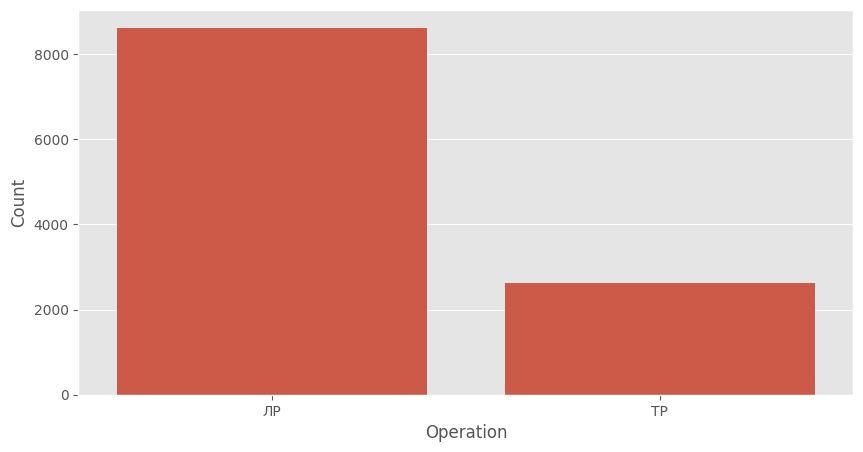

In [69]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=cutting, x=cutting['Operation'], ax=ax,
            y=cutting.groupby(by=['Operation'])['Operation'].transform('count'))
            
ax.set_ylabel("Count");

Листовых деталей значительно больше

Выпишем остальные признаки в отдельный список. Построим для них парами графики boxplot и hist в цикле, чтобы наглядно увидеть распределения значений

In [70]:
cols = ['Width', 'Length', 'Cut_length', 'Cut_quantity',
        'material_mark', 'thickness', 'converted_Time',
        'avg_group_speed']

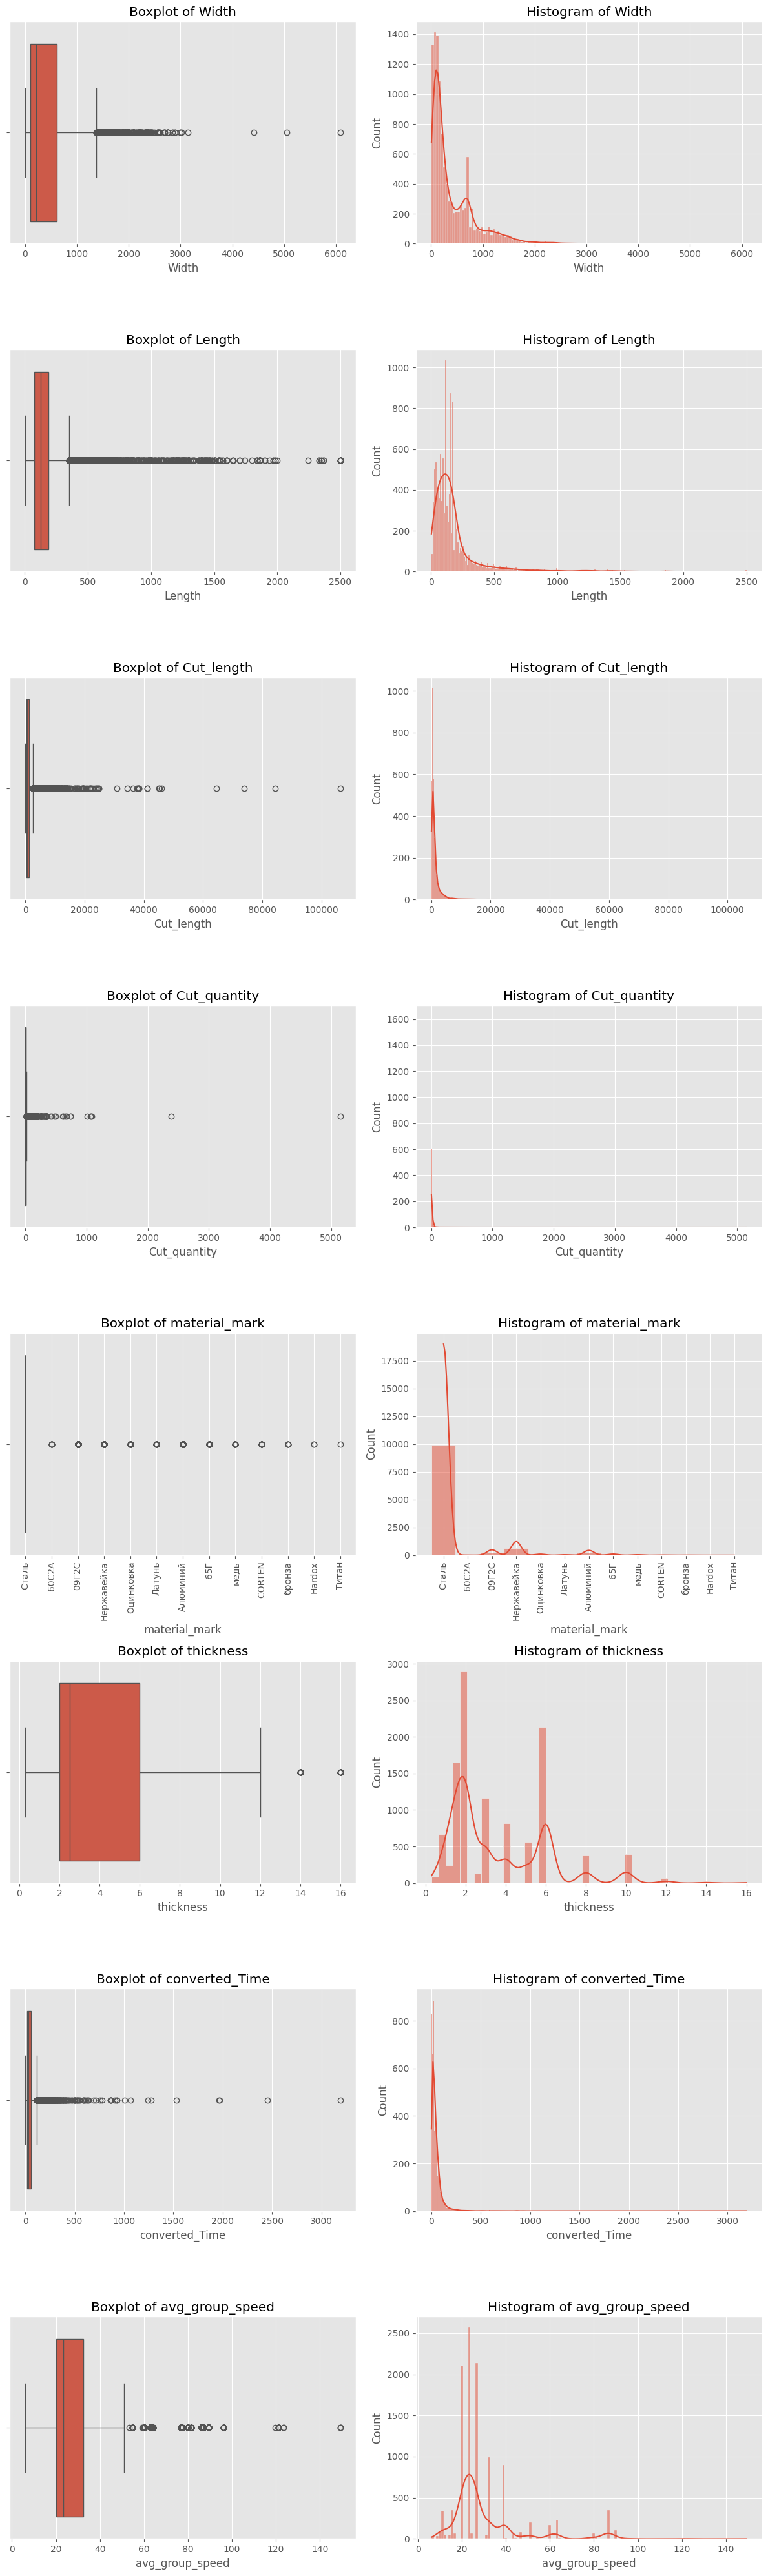

In [71]:
# Параметры
ncols = 2
nrows = len(cols)
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 5 * nrows))

# Построение графиков
for i, col in enumerate(cols):
    sns.boxplot(x=cutting[col], ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}')
    
    sns.histplot(cutting[col], kde=True, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}')
    
    # Проверка типа данных и установка горизонтальных подписей
    if pd.api.types.is_string_dtype(cutting[col]) or isinstance(cutting[col].dtype, pd.CategoricalDtype):
        ax[i, 0].tick_params(axis='x', rotation=90)
        ax[i, 1].tick_params(axis='x', rotation=90)

# Автоматическое распределение графиков
plt.tight_layout()
plt.show()


## Feature engineering

Попробуем создать новые принаки

In [72]:
cutting.head(3)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,36.900,1447.512,39.228
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],2.000,Сталь,3.000,8.000,36.900,1447.512,39.228
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76.000,Сталь,2.000,47.000,44.169,1027.494,23.263


Например, признак, который будет условно характеризовать "плотность" резки.

Т.е насколько больше\меньше резов на единицу площади. Как будто должно быть так:

$$
\frac{\text{Длина реза} * \text{Количество врезок}}{\text{Длина детали} * \text{Ширина детали}}
$$

In [73]:
cutting['density'] = (
    (cutting['Cut_length'] * cutting['Cut_quantity']) /
    (cutting['Width'] * cutting['Length'])
)

In [74]:
cutting.head(5)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,36.900,1447.512,39.228,0.079
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],2.000,Сталь,3.000,8.000,36.900,1447.512,39.228,0.044
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76.000,Сталь,2.000,47.000,44.169,1027.494,23.263,0.126
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]",18.000,Сталь,2.000,53.000,44.169,1027.494,23.263,0.043
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,44.169,1027.494,23.263,0.102


Создадим признак, характеризующий форму детали. Отношение длины к ширине. 

In [75]:
cutting['L/W'] = cutting['Length'] / cutting['Width']
cutting.head(5)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,36.900,1447.512,39.228,0.079,1.000
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],2.000,Сталь,3.000,8.000,36.900,1447.512,39.228,0.044,1.790
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76.000,Сталь,2.000,47.000,44.169,1027.494,23.263,0.126,0.435
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]",18.000,Сталь,2.000,53.000,44.169,1027.494,23.263,0.043,0.134
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,44.169,1027.494,23.263,0.102,0.098


## Кодирование и заполнение пропусков

Посмотрим, где у нас остались пропуски

In [76]:
cutting.isna().sum()

Part_name              0
Material               0
Operation              0
hash                   0
Time                   0
Width                  0
Length                 0
Cut_length             0
Cut_quantity           0
keywords               0
keywords_count      2605
material_mark          0
thickness              0
converted_Time         2
avg_group_time         2
avg_group_length       0
avg_group_speed        0
density                0
L/W                    0
dtype: int64

Остались не переведены в числа столбцы операция и материал + нужно заполнить пропуски в keywords_counts

С операцией всего 2 значения, просто присвоим числа

In [77]:
mapping = {'ЛР': 1,
           'ТР': 2}

cutting['operation_num'] = cutting['Operation'].replace(mapping)

cutting.head(5)

/tmp/ipykernel_6730/3179868479.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cutting['operation_num'] = cutting['Operation'].replace(mapping)


,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,36.900,1447.512,39.228,0.079,1.000,1
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],2.000,Сталь,3.000,8.000,36.900,1447.512,39.228,0.044,1.790,1
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76.000,Сталь,2.000,47.000,44.169,1027.494,23.263,0.126,0.435,2
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]",18.000,Сталь,2.000,53.000,44.169,1027.494,23.263,0.043,0.134,2
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,44.169,1027.494,23.263,0.102,0.098,2


ДЛя кодирования материалов возьмем классический one hot encoding. Нуменклотура не слишком большая. При обучении модели можно будет попробовать применить разные кодировщики

In [78]:
one_hot = OneHotEncoder(dtype=int)

encoded_array = one_hot.fit_transform(cutting[['material_mark']]).toarray()
temp = pd.DataFrame(encoded_array, columns=one_hot.get_feature_names_out(['material_mark']),
                    index=cutting.index)

cutting = pd.concat([cutting, temp], axis=1)
cutting.head(5)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,36.900,1447.512,39.228,0.079,1.000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],2.000,Сталь,3.000,8.000,36.900,1447.512,39.228,0.044,1.790,1,0,0,0,0,0,0,0,0,0,1,0,0,0
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76.000,Сталь,2.000,47.000,44.169,1027.494,23.263,0.126,0.435,2,0,0,0,0,0,0,0,0,0,1,0,0,0
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]",18.000,Сталь,2.000,53.000,44.169,1027.494,23.263,0.043,0.134,2,0,0,0,0,0,0,0,0,0,1,0,0,0
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,44.169,1027.494,23.263,0.102,0.098,2,0,0,0,0,0,0,0,0,0,1,0,0,0


Теперь осталось заполнить пропуски в keywords. Возьмем стандартный knn imputer

In [79]:
cutting.columns

Index(['Part_name', 'Material', 'Operation', 'hash', 'Time', 'Width', 'Length', 'Cut_length', 'Cut_quantity', 'keywords', 'keywords_count', 'material_mark', 'thickness', 'converted_Time', 'avg_group_time', 'avg_group_length', 'avg_group_speed', 'density', 'L/W', 'operation_num', 'material_mark_09Г2С', 'material_mark_60С2А', 'material_mark_65Г', 'material_mark_CORTEN', 'material_mark_Hardox', 'material_mark_Алюминий', 'material_mark_Латунь', 'material_mark_Нержавейка', 'material_mark_Оцинковка', 'material_mark_Сталь', 'material_mark_Титан', 'material_mark_бронза', 'material_mark_медь'], dtype='object')

Выпишем признаки, на которых будет обучаться imputer. Стандартизируем данные (сохраним во вспомогательный df)

In [80]:
scaler = StandardScaler()

columns=['Width', 'Length', 'Cut_length', 'Cut_quantity',
         'keywords_count', 'thickness', 'converted_Time',
         'avg_group_speed', 'density', 'L/W', 'operation_num',
         'material_mark_09Г2С', 'material_mark_60С2А', 'material_mark_65Г',
         'material_mark_CORTEN', 'material_mark_Hardox', 'material_mark_Алюминий', 
         'material_mark_Латунь', 'material_mark_Нержавейка', 'material_mark_Оцинковка',
         'material_mark_Сталь', 'material_mark_Титан', 'material_mark_бронза',
         'material_mark_медь']

scaled_df=pd.DataFrame(scaler.fit_transform(cutting[columns]), columns = columns, index=cutting.index)
scaled_df.head(5)

,Width,Length,Cut_length,Cut_quantity,keywords_count,thickness,converted_Time,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,-0.813,-0.622,-0.425,-0.159,-0.637,-0.236,-0.558,0.541,-0.057,-0.022,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
14,-0.764,-0.319,-0.361,-0.159,-0.654,-0.236,-0.507,0.541,-0.061,0.390,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
17,-0.108,-0.132,-0.260,0.014,-0.396,-0.643,-0.003,-0.404,-0.052,-0.316,1.813,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
32,1.679,-0.132,-0.284,0.062,-0.598,-0.643,0.074,-0.404,-0.061,-0.473,1.813,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
57,2.618,-0.132,-0.212,0.377,2.654,-0.643,0.746,-0.404,-0.055,-0.492,1.813,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047


Применяем imputer и переводим результат в датафрейм, сорхранив названия признаков и индексы)

In [81]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
cutting_input = pd.DataFrame(imputer.fit_transform(scaled_df),columns=columns, index=cutting.index)
cutting_input.head(5)

,Width,Length,Cut_length,Cut_quantity,keywords_count,thickness,converted_Time,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,-0.813,-0.622,-0.425,-0.159,-0.637,-0.236,-0.558,0.541,-0.057,-0.022,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
14,-0.764,-0.319,-0.361,-0.159,-0.654,-0.236,-0.507,0.541,-0.061,0.390,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
17,-0.108,-0.132,-0.260,0.014,-0.396,-0.643,-0.003,-0.404,-0.052,-0.316,1.813,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
32,1.679,-0.132,-0.284,0.062,-0.598,-0.643,0.074,-0.404,-0.061,-0.473,1.813,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047
57,2.618,-0.132,-0.212,0.377,2.654,-0.643,0.746,-0.404,-0.055,-0.492,1.813,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.246,-0.069,0.362,-0.009,-0.021,-0.047


Возвращаем данным исходный масштаб

In [82]:
cutting_input = pd.DataFrame(scaler.inverse_transform(cutting_input), 
                             columns=cutting_input.columns, index=cutting.index)
cutting_input.head(5)

,Width,Length,Cut_length,Cut_quantity,keywords_count,thickness,converted_Time,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,40.000,40.000,126.000,1.000,7.000,3.000,4.000,39.228,0.079,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
14,62.000,111.000,304.000,1.000,2.000,3.000,8.000,39.228,0.044,1.790,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
17,356.000,155.000,581.000,12.000,76.000,2.000,47.000,23.263,0.126,0.435,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
32,1156.000,155.000,517.000,15.000,18.000,2.000,53.000,23.263,0.043,0.134,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
57,1576.000,155.000,714.000,35.000,948.000,2.000,105.000,23.263,0.102,0.098,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000


Проверяем nan

In [83]:
cutting_input.isna().sum()

Width                       0
Length                      0
Cut_length                  0
Cut_quantity                0
keywords_count              0
thickness                   0
converted_Time              0
avg_group_speed             0
density                     0
L/W                         0
operation_num               0
material_mark_09Г2С         0
material_mark_60С2А         0
material_mark_65Г           0
material_mark_CORTEN        0
material_mark_Hardox        0
material_mark_Алюминий      0
material_mark_Латунь        0
material_mark_Нержавейка    0
material_mark_Оцинковка     0
material_mark_Сталь         0
material_mark_Титан         0
material_mark_бронза        0
material_mark_медь          0
dtype: int64

Заменяем признак на новый, заполненный, попутно переведем в int

In [84]:
cutting['keywords_count']=cutting_input['keywords_count'].astype(int)
cutting.head(5)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7,Сталь,3.000,4.000,36.900,1447.512,39.228,0.079,1.000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,[след],1,Сталь,3.000,8.000,36.900,1447.512,39.228,0.044,1.790,1,0,0,0,0,0,0,0,0,0,1,0,0,0
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",76,Сталь,2.000,47.000,44.169,1027.494,23.263,0.126,0.435,2,0,0,0,0,0,0,0,0,0,1,0,0,0
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр]",18,Сталь,2.000,53.000,44.169,1027.494,23.263,0.043,0.134,2,0,0,0,0,0,0,0,0,0,1,0,0,0
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948,Сталь,2.000,105.000,44.169,1027.494,23.263,0.102,0.098,2,0,0,0,0,0,0,0,0,0,1,0,0,0


In [85]:
len(cutting[cutting['keywords_count']==0])

0

## Визуализация (признак \ target) 

Посмотрим на влияние каждого признака на target (время резки)

In [86]:
cutting.columns

Index(['Part_name', 'Material', 'Operation', 'hash', 'Time', 'Width', 'Length', 'Cut_length', 'Cut_quantity', 'keywords', 'keywords_count', 'material_mark', 'thickness', 'converted_Time', 'avg_group_time', 'avg_group_length', 'avg_group_speed', 'density', 'L/W', 'operation_num', 'material_mark_09Г2С', 'material_mark_60С2А', 'material_mark_65Г', 'material_mark_CORTEN', 'material_mark_Hardox', 'material_mark_Алюминий', 'material_mark_Латунь', 'material_mark_Нержавейка', 'material_mark_Оцинковка', 'material_mark_Сталь', 'material_mark_Титан', 'material_mark_бронза', 'material_mark_медь'], dtype='object')

Оставим только обработанные признаки

In [87]:
features = ['Width', 'Length', 'Cut_length', 'Cut_quantity',
            'keywords_count', 'material_mark', 'thickness', 
            'avg_group_time', 'avg_group_length',
            'avg_group_speed', 'density', 'L/W']

Построим в цикле графики зависимости time от признака

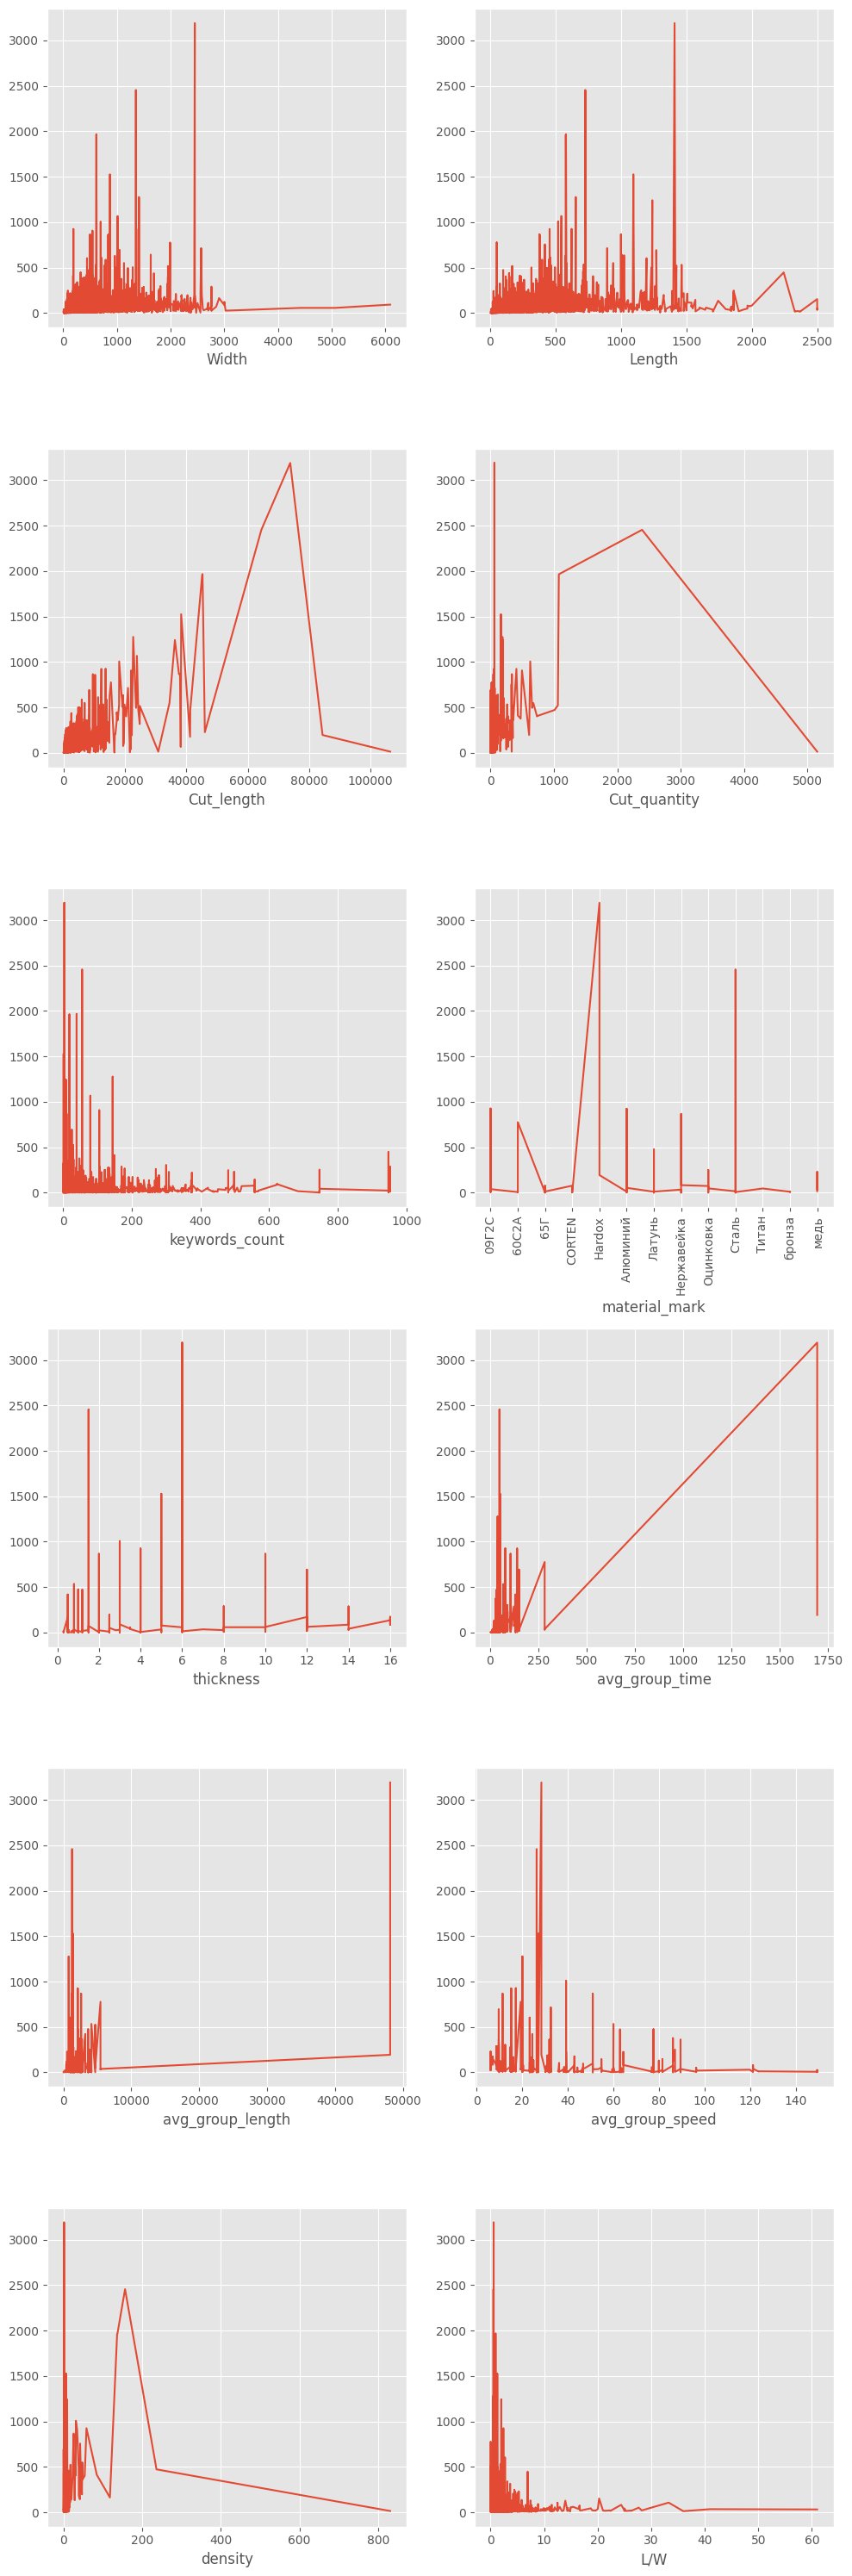

In [88]:
n_cols = 2
n_rows = len(features) // n_cols + len(features) % n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 30))

for index, name in enumerate(features):
    col = index % n_cols
    row = index // n_cols
    
    sorted_df = cutting.sort_values(by=name)
    x = sorted_df[name]
    y = sorted_df['converted_Time']
    
    ax[row, col].plot(x, y)
    ax[row, col].set_xlabel(name)
    
    # Проверка типа данных и настройка поворота меток
    if pd.api.types.is_string_dtype(cutting[name]) or isinstance(cutting[name].dtype, pd.CategoricalDtype):
        ax[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Надо проверить значения Cut_length > 60_000, очень странно время растет растет и резко падает

In [89]:
cutting[cutting['Cut_length'] > 60_000]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
131674,10.1.99.180.30.01 Экран,"лист х/к т. 1,5 мм.",ЛР,7766dbae06,00:40:55.3,1353.000,728.000,64459,2390,[экран],55,Сталь,1.500,2455.000,48.875,1286.496,26.322,156.406,0.538,1,0,0,0,0,0,0,0,0,0,1,0,0,0
215982,МРНУ.745323.002-01 Стенка задняя,"лист х/к т. 1,5 мм.",ЛР,71354733be,00:03:16.7,1202.000,914.000,84394,609,"[мрну, стенка, задняя]",39,Сталь,1.500,197.000,48.875,1286.496,26.322,46.782,0.760,1,0,0,0,0,0,0,0,0,0,1,0,0,0
335276,"HARDOX1 500.Л6,0 мм-(металл заказчика 1410х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,711bcf86fc,00:53:10.8,2450.000,1410.000,73860,61,"[металл, заказчика]",3,Hardox,6.000,3191.000,1692.500,48057.000,28.394,1.304,0.576,1,0,0,0,0,1,0,0,0,0,0,0,0,0
422519,Перф. лист 1100х600х1 мм,"лист х/к т. 1,0 мм.",ЛР,44fc5325bf,00:00:13.5,1100.000,600.000,106420,5152,"[перф, лист]",29,Сталь,1.000,14.000,29.188,2512.720,86.089,830.721,0.545,1,0,0,0,0,0,0,0,0,0,1,0,0,0


422519 какая-то ошибка. 13 секунд что-то нереальное, и 3 минуты (215982) тоже похоже на ошибку. Уберем

In [90]:
cutting.drop([422519, 215982], inplace=True)

Похожая проверка нужна и в cut_quantity

In [91]:
cutting[(cutting['Cut_quantity'] < 500) &
       (cutting['converted_Time'] > 1500)]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
335276,"HARDOX1 500.Л6,0 мм-(металл заказчика 1410х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,711bcf86fc,00:53:10.8,2450.000,1410.000,73860,61,"[металл, заказчика]",3,Hardox,6.000,3191.000,1692.500,48057.000,28.394,1.304,0.576,1,0,0,0,0,1,0,0,0,0,0,0,0,0
415703,Корыто_2404_2_сталь5мм,"лист г/к т. 5,0 мм.",ЛР,6524431038,00:25:26.6,870.000,1095.000,38327,164,"[корыто, стальмм]",1,Сталь,5.000,1527.000,52.160,1411.503,27.061,6.598,1.259,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Не похоже на выбросы, оставим

Еще одна проверка в групповом времени

In [92]:
cutting[cutting['avg_group_time'] > 1500]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
334907,"HARDOX1 500.Л6,0 мм-(металл заказчика 550х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,7198efef65,00:03:14.4,2450.000,550.000,22254,15,"[металл, заказчика]",3,Hardox,6.000,194.000,1692.500,48057.000,28.394,0.248,0.224,1,0,0,0,0,1,0,0,0,0,0,0,0,0
335276,"HARDOX1 500.Л6,0 мм-(металл заказчика 1410х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,711bcf86fc,00:53:10.8,2450.000,1410.000,73860,61,"[металл, заказчика]",3,Hardox,6.000,3191.000,1692.500,48057.000,28.394,1.304,0.576,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [93]:
#Этот товарищ подозрительный, уберем
cutting.drop([334907], inplace=True)

In [94]:
cutting[(cutting['density'] > 150) &
       (cutting['converted_Time'] < 1000)]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
121291,99-1.210.01 Решетка 1040х100 мм,"лист х/к т. 1,2 мм.",ЛР,4176a6442,00:07:51.6,1040.000,100.000,24361,1009,[решетка],10,Сталь,1.200,472.000,34.319,2157.889,62.878,236.349,0.096,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [95]:
cutting[(cutting['density'] < 20) &
       (cutting['converted_Time'] > 1500)]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
335276,"HARDOX1 500.Л6,0 мм-(металл заказчика 1410х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,711bcf86fc,00:53:10.8,2450.000,1410.000,73860,61,"[металл, заказчика]",3,Hardox,6.000,3191.000,1692.500,48057.000,28.394,1.304,0.576,1,0,0,0,0,1,0,0,0,0,0,0,0,0
415703,Корыто_2404_2_сталь5мм,"лист г/к т. 5,0 мм.",ЛР,6524431038,00:25:26.6,870.000,1095.000,38327,164,"[корыто, стальмм]",1,Сталь,5.000,1527.000,52.160,1411.503,27.061,6.598,1.259,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [96]:
cutting[(cutting['Cut_length'] > 20000) &
       (cutting['material_mark'] == "Сталь")]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
17432,Раскладка 2 мм,"лист х/к т. 2,0 мм.",ЛР,609dcd51f6,00:00:14.4,791.000,943.000,30868,334,[раскладка],6,Сталь,2.000,14.000,44.169,1027.494,23.263,13.822,1.192,1,0,0,0,0,0,0,0,0,0,1,0,0,0
26689,10.01.04_Доп_Решетка,"лист х/к т. 1,5 мм.",ЛР,660b0c7ac1,00:02:57.3,1007.000,900.000,41233,309,"[доп, решетка]",10,Сталь,1.500,177.000,48.875,1286.496,26.322,14.058,0.894,1,0,0,0,0,0,0,0,0,0,1,0,0,0
26854,10.01.09_Доп_Решетка,"лист х/к т. 1,5 мм.",ЛР,6612f91443,00:03:48.2,1009.000,900.000,46045,335,"[доп, решетка]",10,Сталь,1.500,228.000,48.875,1286.496,26.322,16.986,0.892,1,0,0,0,0,0,0,0,0,0,1,0,0,0
73255,Развертка - 51360-0103 Конус,"лист г/к т. 4,0 мм.",ЛР,263d93a4c6,00:11:54.8,2568.000,895.000,21007,66,"[развертка, конус]",6,Сталь,4.000,715.000,37.343,1214.962,32.535,0.603,0.349,1,0,0,0,0,0,0,0,0,0,1,0,0,0
82402,ТБНД.71.02.14.01_изм1 - Стенка передняя,"лист х/к т. 1,5 мм.",ЛР,35587290000000,00:32:42.5,617.000,579.000,45179,1077,"[тбнд, изм, стенка, передняя]",18,Сталь,1.500,1962.000,48.875,1286.496,26.322,136.204,0.938,1,0,0,0,0,0,0,0,0,0,1,0,0,0
82781,ТБНД.71.02.15.01_изм1 - Стенка задняя,"лист х/к т. 1,5 мм.",ЛР,35f6ee37e7,00:32:47.7,617.000,580.000,45292,1083,"[тбнд, изм, стенка, задняя]",39,Сталь,1.500,1968.000,48.875,1286.496,26.322,137.068,0.940,1,0,0,0,0,0,0,0,0,0,1,0,0,0
87184,ТБНД.71.02.12.01_изм1 - Стенка левая,"лист х/к т. 1,5 мм.",ЛР,353929ed57,00:15:07.5,545.000,580.000,22002,496,"[тбнд, изм, стенка, левая]",105,Сталь,1.500,908.000,48.875,1286.496,26.322,34.524,1.064,1,0,0,0,0,0,0,0,0,0,1,0,0,0
119044,99.100 Экран 1180х722 мм,"лист х/к т. 1,2 мм.",ЛР,65e1a43b57,00:02:44.8,1180.000,722.000,21747,23,[экран],55,Сталь,1.200,165.000,34.319,2157.889,62.878,0.587,0.612,1,0,0,0,0,0,0,0,0,0,1,0,0,0
121291,99-1.210.01 Решетка 1040х100 мм,"лист х/к т. 1,2 мм.",ЛР,4176a6442,00:07:51.6,1040.000,100.000,24361,1009,[решетка],10,Сталь,1.200,472.000,34.319,2157.889,62.878,236.349,0.096,1,0,0,0,0,0,0,0,0,0,1,0,0,0
131674,10.1.99.180.30.01 Экран,"лист х/к т. 1,5 мм.",ЛР,7766dbae06,00:40:55.3,1353.000,728.000,64459,2390,[экран],55,Сталь,1.500,2455.000,48.875,1286.496,26.322,156.406,0.538,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Есть подозрительно выбивающиеся значения, так что ввидем фильтр. (Не может длина реза 20000мм резаться 8 секунд)

In [97]:
cutting.drop(cutting[(cutting['Cut_length'] > 15000) &
       (cutting['converted_Time'] < 500)].index, inplace = True)

Посмотрим на обновленные графики

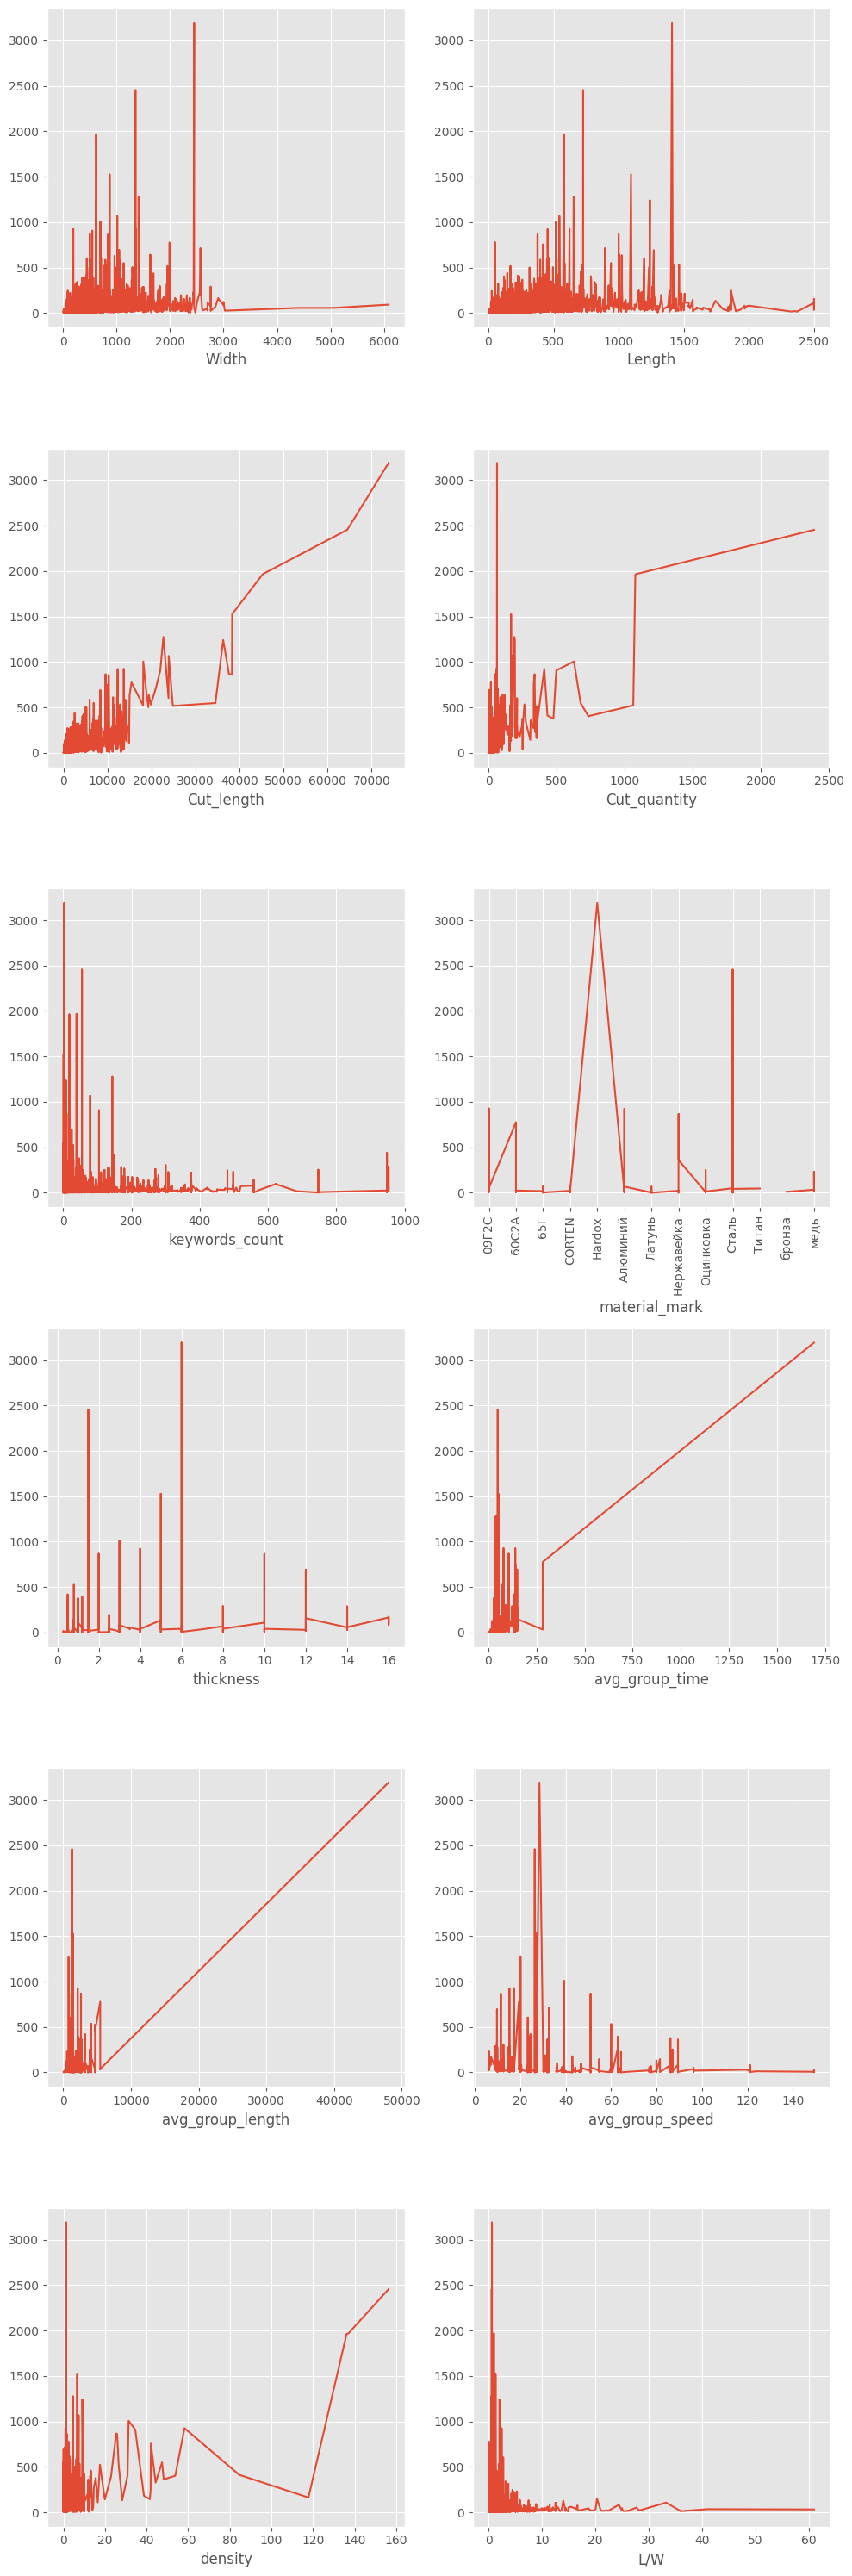

/tmp/ipykernel_6730/3123729770.py:40: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[name]) or pd.api.types.is_categorical_dtype(cutting[name]):
/tmp/ipykernel_6730/3123729770.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
/tmp/ipykernel_6730/3123729770.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
/tmp/ipykernel_6730/3123729770.py:40: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[na

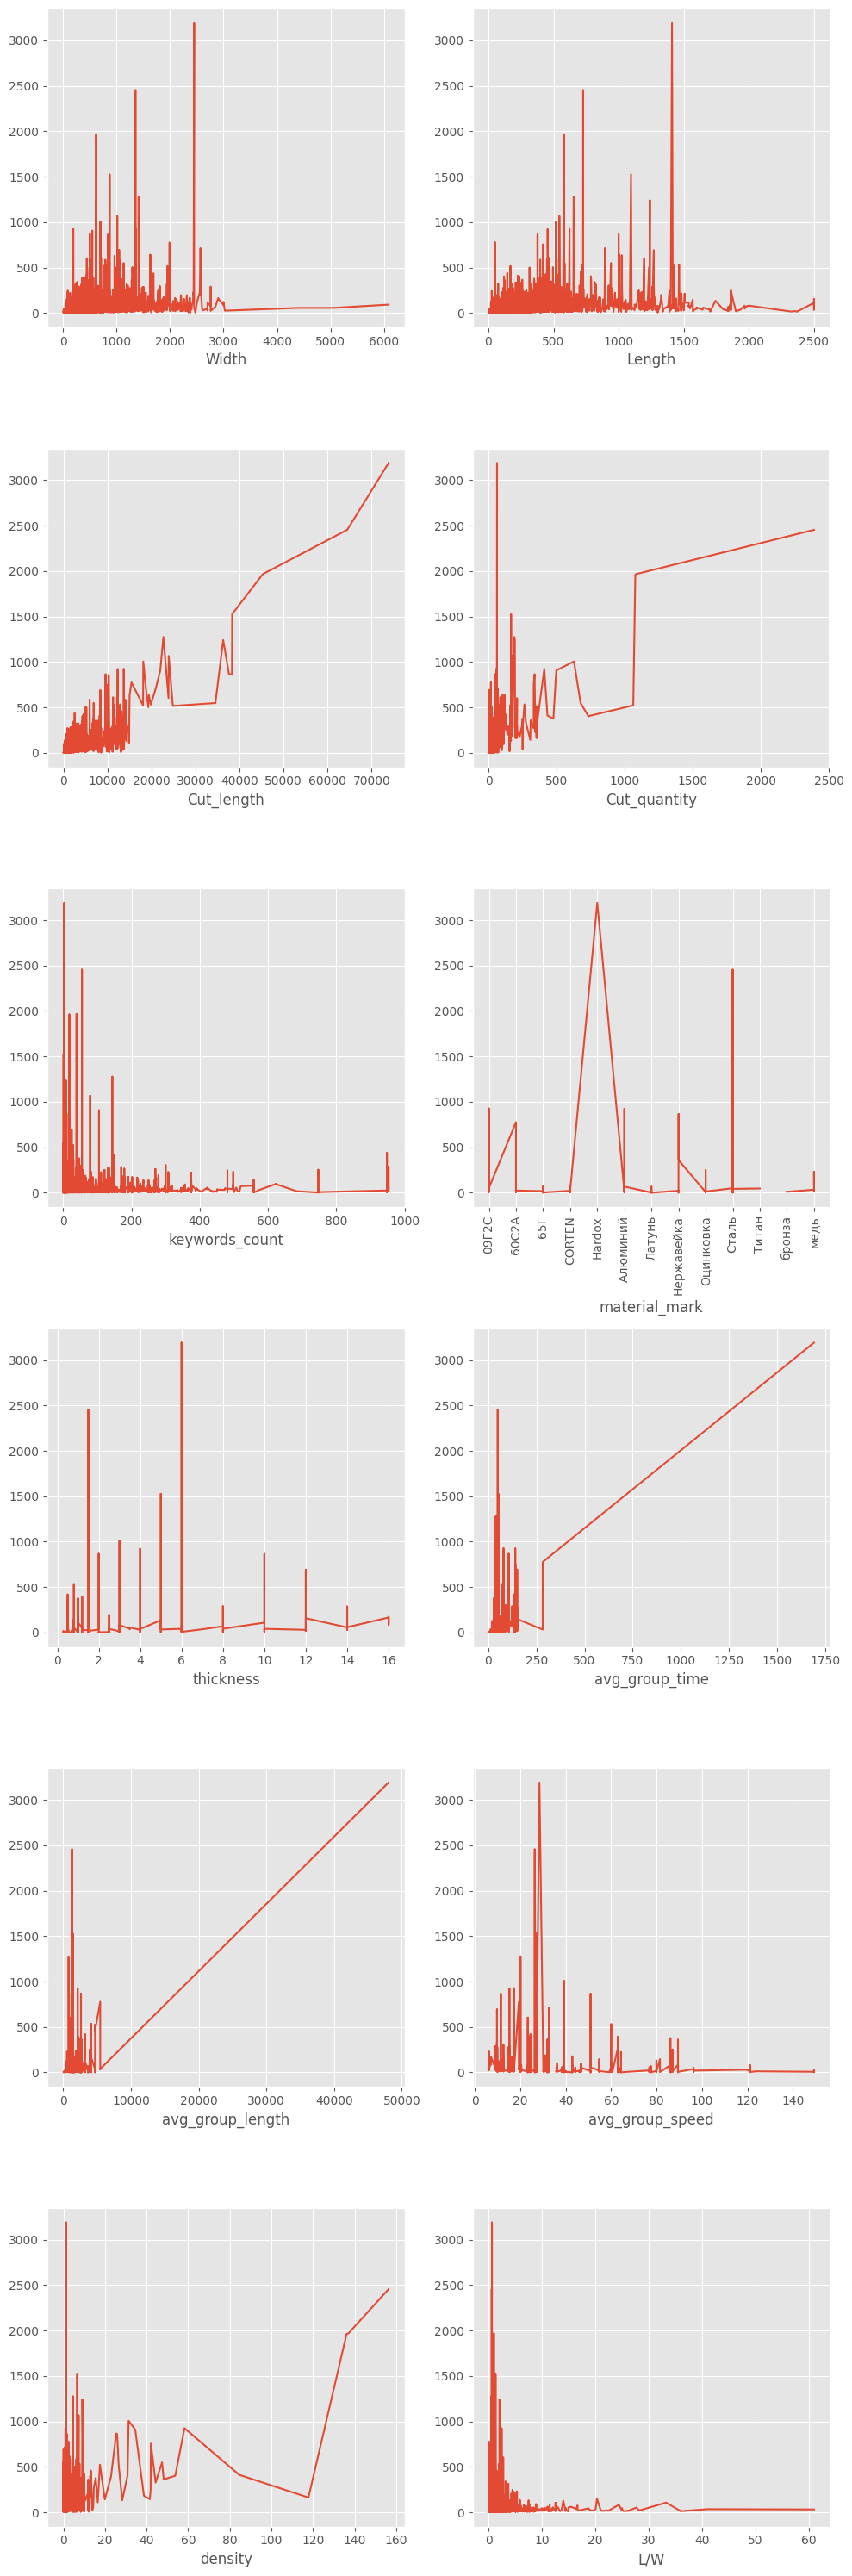

In [99]:
n_cols = 2
n_rows = len(features) // n_cols + len(features) % n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 30))

for index, name in enumerate(features):
    col = index % n_cols
    row = index // n_cols
    
    sorted_df = cutting.sort_values(by=name)
    x = sorted_df[name]
    y = sorted_df['converted_Time']
    
    ax[row, col].plot(x, y)
    ax[row, col].set_xlabel(name)
    
    # Проверка типа данных и настройка поворота меток
    if pd.api.types.is_string_dtype(cutting[name]) or isinstance(cutting[name].dtype, pd.CategoricalDtype):
        ax[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

n_cols = 2
n_rows = len(features) // n_cols + len(features) % n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 30))

for index, name in enumerate(features):
    col = index % n_cols
    row = index // n_cols
    
    sorted_df = cutting.sort_values(by=name)
    x = sorted_df[name]
    y = sorted_df['converted_Time']
    
    ax[row, col].plot(x, y)
    ax[row, col].set_xlabel(name)
    
    if pd.api.types.is_string_dtype(cutting[name]) or pd.api.types.is_categorical_dtype(cutting[name]):
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Выглядит так, что данные стали почище от выбросов

# Итог 

Провели разведывательный анализ данных. Привели в порядок форматы, заполнили пропуски, почистили от выбросов, создали признаки. 

Обучение модели проведем в новом блокноте MODEL